**Title: Creating Notebooks for Data Science "Understanding Data"**

Preprocessing the Text Data

The Threads App dataset, sourced from user reviews of the Threads mobile app on both Google Play Store and the App Store, offers a comprehensive repository of user sentiments and insights. 

Threads App is a text-based conversational app which was launched in July,2023. Many people felt it to be a lot like Twitter and started comparing both. It gained more popularity as soon as it launched and we can gain more insights about the App Reviews in this Notebook by analysing the text.

Threads crossed the 100 million user mark less than a week after its launch, making it the fastest-growing app in history.

Understanding the language users use to describe their experiences with the Threads app allows companies to evaluate its performance objectively. By identifying both strengths and weaknesses, companies can prioritize improvements to enhance the user experience.

It also serves as a real-time feedback loop, enabling brands to manage their reputation effectively by amplifying positive sentiments and addressing any negative issues promptly. 

Constraints: Limited computational resources

This Notebook contains understanding the data, visualizing, preprocessing the data

In [1]:
'''Required libraries'''
#%pip install wordcloud
#%pip install emoji
#%pip install langdetect

'Required libraries'

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk

import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')

Reading the csv data which is located in data folder into pandas dataframe

In [4]:

df = pd.read_csv("data\\threads_reviews.csv")

Dataset contains fours features to analyse the problem,solve the problem by analysing the data using text preprocessing techniques like some of the text is not english and we can try to translate them.

In [5]:
print(df.head())
# print(df.info())

        source                      review_description  rating  \
0  Google Play  Very good app for Android phone and me       5   
1  Google Play                                  Sl👍👍👍👍       5   
2  Google Play                                Best app       5   
3  Google Play                              Gatiya app       1   
4  Google Play                                Lit bruv       5   

        review_date  
0  27-08-2023 10:31  
1  27-08-2023 10:28  
2   27-08-2023 9:47  
3   27-08-2023 9:13  
4   27-08-2023 9:00  


Checking the null values in the dataset. No null values found in the dataset

In [6]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

We can see that we have 2 unique sources, 5 points for ratings and reviews with their posted date.

In [7]:
print(df.nunique())

source                    2
review_description    32894
rating                    5
review_date           16742
dtype: int64


Most of the reviews contain 1(negative) and 5(positive) as ratings and the sasmple for 2,3,4 ratings are less

e:\INFO_7390_ADS\Assignment1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\INFO_7390_ADS\Assignment1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\INFO_7390_ADS\Assignment1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


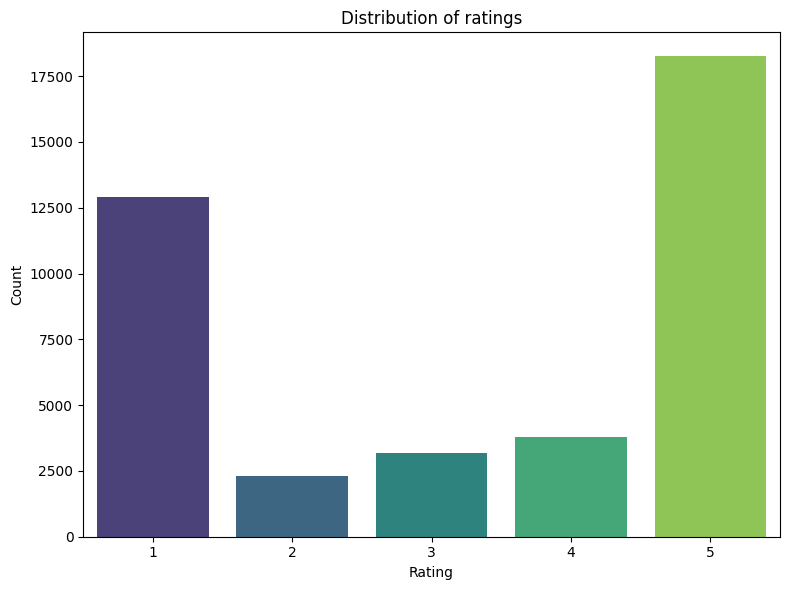

In [8]:

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

How are the rating distributed in Google Play Store and App Store seperately?

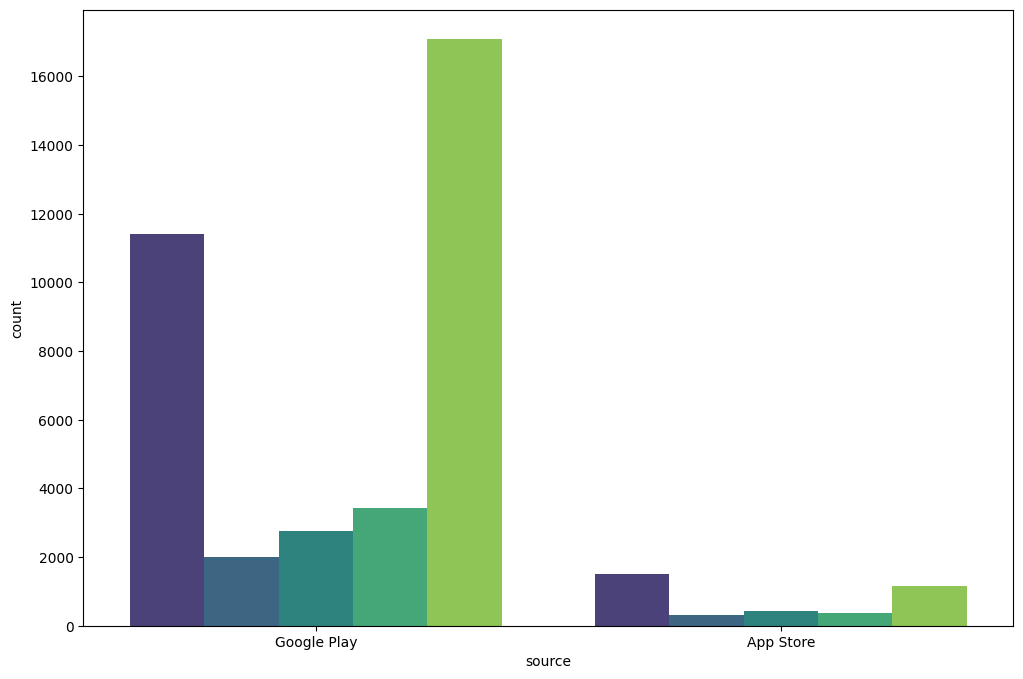

In [7]:
try:

    plt.figure(figsize=(12,8))
    sns.countplot(x=df['source'],hue=df['rating'],palette='viridis')
    plt.show()
except:
    pass

Using WordCloud to understand what are common words associated with each rating. Function to give wordcloud for different ratings

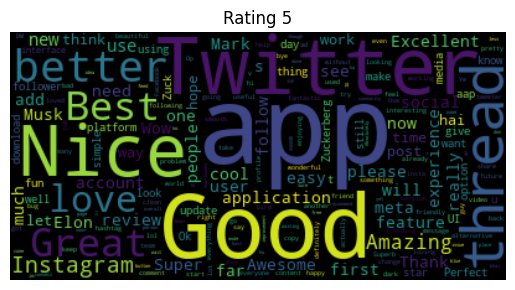

In [8]:
from wordcloud import WordCloud

def create_wordcloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_wordcloud(5)

5 Star rating reviews most common useful words include: Twitter, Good, better

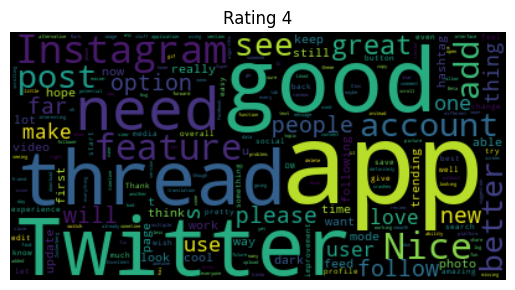

In [9]:
create_wordcloud(4)

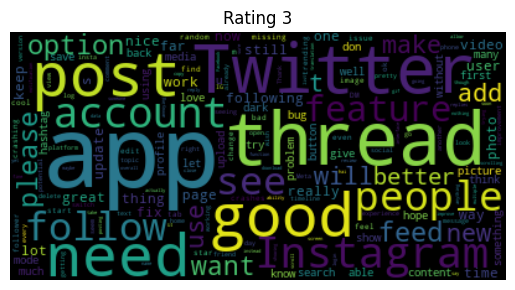

In [11]:
create_wordcloud(3)

From 2 and 1 star rating reviews, it suggests they were also referring to Twitter, copy, Worst, account, app, fix, bug, download

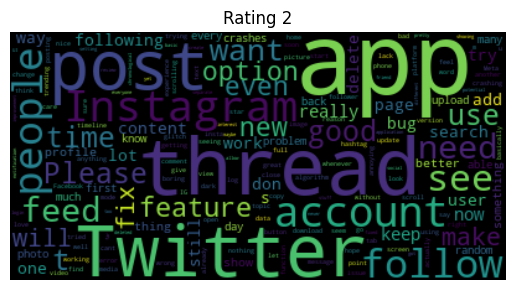

In [12]:
create_wordcloud(2)

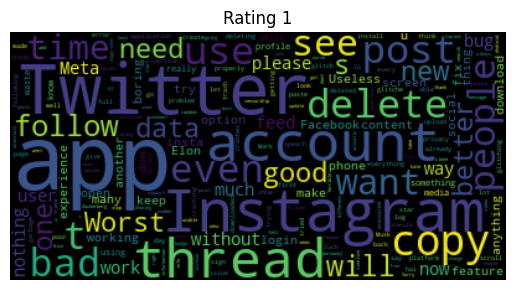

In [13]:
create_wordcloud(1)

Cleaning the data by removing the emojis, punctuations and making lowercase text for consistent data and creating a new feature to store the transformed review text

In [14]:
import string
import emoji
import re
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'\d+','',text)
    text = emoji.demojize(text)
    text = ''.join([i for i in text if i not in string.punctuation])
    return text
df['new_review'] = df['review_description'].apply(cleaning_text)

Checking whether there is still inconsistency in the data

In [15]:
df.tail(5)

,source,review_description,rating,review_date,new_review
40430,App Store,They don’t let you delete your account once yo...,1,27-08-2023 4:21,they don’t let you delete your account once yo...
40431,App Store,Twitter >>>> Threads,1,27-08-2023 1:23,twitter threads
40432,App Store,"Really? Hard to believe. I’m not in Calif., bu...",1,26-08-2023 20:51,really hard to believe i’m not in calif but in...
40433,App Store,"While the app seems like a good start, it seem...",2,26-08-2023 19:49,while the app seems like a good start it seems...
40434,App Store,Been on it one day and it glitches and no one ...,1,26-08-2023 18:49,been on it one day and it glitches and no one ...


We can still see there are contractions in words which needs to be transformed.

Tokenization, the process of breaking text into words or tokens, is simplified when contractions are expanded. Contractions can also complicate text normalization tasks, such as stemming or lemmatization. Expanding contractions simplifies these processes and ensures that words are reduced to their base forms correctly.

When translating text from one language to another, variations in contractions can pose challenges. Machine translation models need to be trained to recognize and handle contractions appropriately.

ref- https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/blob/main/Understanding_Data/Notebooks_Understanding_Data/Processing_of_Text_Data.ipynb

It is observed below from the first row that "don't" is transformed to "do not" by applying transformation for contractions.

In [17]:
import contractions
df['contractions'] = df['new_review'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df['no_contractions'] = [' '.join(map(str, l)) for l in df['contractions']]
df.drop('contractions',axis=1,inplace=True)
df.tail(5)

,source,review_description,rating,review_date,new_review,no_contractions
40430,App Store,They don’t let you delete your account once yo...,1,27-08-2023 4:21,they don’t let you delete your account once yo...,they do not let you delete your account once y...
40431,App Store,Twitter >>>> Threads,1,27-08-2023 1:23,twitter threads,twitter threads
40432,App Store,"Really? Hard to believe. I’m not in Calif., bu...",1,26-08-2023 20:51,really hard to believe i’m not in calif but in...,really hard to believe i am not in calif but i...
40433,App Store,"While the app seems like a good start, it seem...",2,26-08-2023 19:49,while the app seems like a good start it seems...,while the app seems like a good start it seems...
40434,App Store,Been on it one day and it glitches and no one ...,1,26-08-2023 18:49,been on it one day and it glitches and no one ...,been on it one day and it glitches and no one ...


We can still observe there are non-english words in text.

In [18]:
df.head()

,source,review_description,rating,review_date,new_review,no_contractions
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31,very good app for android phone and me,very good app for android phone and me
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28,slthumbsupthumbsupthumbsupthumbsup,slthumbsupthumbsupthumbsupthumbsup
2,Google Play,Best app,5,27-08-2023 9:47,best app,best app
3,Google Play,Gatiya app,1,27-08-2023 9:13,gatiya app,gatiya app
4,Google Play,Lit bruv,5,27-08-2023 9:00,lit bruv,lit bruv


Using Googletrans, trying to test the translation for a custom dataset with text column.
To translate the data, first we are going to detect the english text and ignore them as it is. Then we are only going to transate the texts which are not in english usng Translator()

In [19]:
from langdetect import detect
from googletrans import Translator
translator = Translator()  

data = {'text': ['Bonjour', 'How are you?', 'Wie geht es Ihnen?', 'Hola, ¿cómo estás?']}
dummy_df = pd.DataFrame(data)

def translate_non_english_sentence(text):
    try:
        detected_language = detect(text)
        
        if detected_language != 'en':
           return translator.translate(text, dest='en').text
        else:
            return text
    except:
        return text

# Trying the algorithm on a dummyy data
dummy_df['English_translated'] = dummy_df['text'].apply(translate_non_english_sentence)
print(dummy_df)

                 text  English_translated
0             Bonjour             Bonjour
1        How are you?        How are you?
2  Wie geht es Ihnen?  How are you doing?
3  Hola, ¿cómo estás?  Hello how are you?


As the GoogleTrans is working as expected, we can try to use it on our dataset. After running, noticed that it is taking more than 45 mins which is very long and is not suggested as it costs time and money in real time.

Commented the code for whole dataset and tried on a sample of 20 reviews which worked fine.

In [21]:
# df['Translated']= df['no_contractions'].apply(translate_non_english)
# print(df.head())

In [22]:
df_translate_sample=df.head(20)
df_translate_sample['English_translated'] = df_translate_sample['no_contractions'].apply(translate_non_english_sentence)

df_translate_sample.sample(5)

,source,review_description,rating,review_date,new_review,no_contractions,English_translated
10,Google Play,Elon from marse,5,27-08-2023 8:00,elon from marse,elon from marse,elon from marse
4,Google Play,Lit bruv,5,27-08-2023 9:00,lit bruv,lit bruv,brusty
5,Google Play,Good,5,27-08-2023 8:48,good,good,good
12,Google Play,बहुत अच्छा एप्लीकेशन,5,27-08-2023 7:41,बहुत अच्छा एप्लीकेशन,बहुत अच्छा एप्लीकेशन,Very good application
13,Google Play,Super app,5,27-08-2023 7:20,super app,super app,super app


Translating the entire dataset on a local computer with less computation speed is the Setback and have to wait longer than 45 mins to translate. So, a small sample of the dataset is taken to show how we can translate the dataset using Googletrans library

![Alt text](image.png)

Continuing by following the next steps for preprocessing

In [28]:
df.head()

,source,review_description,rating,review_date,new_review,no_contractions,Stemmed_Text
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31,very good app for android phone and me,very good app for android phone and me,very good app for android phone and me
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28,slthumbsupthumbsupthumbsupthumbsup,slthumbsupthumbsupthumbsupthumbsup,slthumbsupthumbsupthumbsupthumbsup
2,Google Play,Best app,5,27-08-2023 9:47,best app,best app,best app
3,Google Play,Gatiya app,1,27-08-2023 9:13,gatiya app,gatiya app,gatiya app
4,Google Play,Lit bruv,5,27-08-2023 9:00,lit bruv,lit bruv,lit bruv


Stemming may reduce redundancy as most of the time the word stem and their derived words mean the same. We can also observe that few words doesnot make sense in english.
There are several different algorithms for stemming, including the Porter stemmer, Snowball stemmer, and the Lancaster stemmer. 

The Porter stemmer is the most widely used algorithm, and it is based on a set of heuristics that are used to remove common suffixes from words. The Snowball stemmer is a more advanced algorithm that is based on the Porter stemmer, but it also supports several other languages in addition to English.

Over-stemming occurs when two words are stemmed from the same root that are of different stems. Over-stemming can also be regarded as false-positives. Over-stemming is a problem that can occur when using stemming algorithms in natural language processing. It refers to the situation where a stemmer produces a root form that is not a valid word or is not the correct root form of a word. This can happen when the stemmer is too aggressive in removing suffixes or when it does not consider the context of the word.

Under-stemming occurs when two words are stemmed from the same root that are not of different stems. Under-stemming can be interpreted as false-negatives. Under-stemming is a problem that can occur when using stemming algorithms in natural language processing. It refers to the situation where a stemmer does not produce the correct root form of a word or does not reduce a word to its base form. This can happen when the stemmer is not aggressive enough in removing suffixes or when it is not designed for the specific task or language.

Porter’s Stemmer algorithm :

 It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes. . The main applications of Porter Stemmer include data mining and Information retrieval. It is only limited to English words. Also, the group of stems is mapped on to the same stem and the output stem is not necessarily a meaningful word. The algorithms are fairly lengthy in nature and are known to be the oldest stemmer.

 Rule Example: EED -> EE

Description: This rule applies when a word has at least one vowel followed by a consonant, and it ends with "EED." In this case, the rule changes the ending to "EE."

Example:

Original Word: "agreed"
Apply Rule: "agreEED" → "agreEE"
Stemmed Word: "agree"
In this example, the word "agreed" is stemmed using the Porter Stemmer algorithm. The rule detects the "EED" ending, and since the word has at least one vowel (the 'a') followed by a consonant ('gr'), the rule applies. As a result, the ending "EED" is changed to "EE," and the stemmed word is "agree."

In [23]:
#%pip install scikit-learn

To have more control over stemming process, defined custom rules as those incorrect words are in top 5 which are most used stop words.

In [29]:
from nltk.stem import PorterStemmer

custom_rules = {
    "this": "this",  
    "very": "very",   
}
ps = PorterStemmer()

def stem_text(text):
    words = text.split() 
    stemmed_words = []
    
    for word in words:
        if word in custom_rules:
            stemmed_word = custom_rules[word]
        else:
            stemmed_word = ps.stem(word)  
        stemmed_words.append(stemmed_word)
    
    return ' '.join(stemmed_words)

# Applying the customized stemmed function 
df['Stemmed_Text'] = df['no_contractions'].apply(stem_text)

print(df.head())

        source                      review_description  rating  \
0  Google Play  Very good app for Android phone and me       5   
1  Google Play                                  Sl👍👍👍👍       5   
2  Google Play                                Best app       5   
3  Google Play                              Gatiya app       1   
4  Google Play                                Lit bruv       5   

        review_date                              new_review  \
0  27-08-2023 10:31  very good app for android phone and me   
1  27-08-2023 10:28      slthumbsupthumbsupthumbsupthumbsup   
2   27-08-2023 9:47                                best app   
3   27-08-2023 9:13                              gatiya app   
4   27-08-2023 9:00                                lit bruv   

                          no_contractions  \
0  very good app for android phone and me   
1      slthumbsupthumbsupthumbsupthumbsup   
2                                best app   
3                              gatiya app   

If we use below commented code, it will give noise to the datset.

In [37]:
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer

# ps = PorterStemmer() 
# stemmed = []

# def stem_text(text):
#     words = text.split()  # Split the text into words
#     stemmed_words = [ps.stem(word) for word in words]  # Apply stemming to each word
#     return ' '.join(stemmed_words)

# df['Stemmed_Text'] = df['no_contractions'].apply(stem_text)

# # Display the DataFrame with the stemmed column
# print(df.head())

        source                      review_description  rating  \
0  Google Play  Very good app for Android phone and me       5   
1  Google Play                                  Sl👍👍👍👍       5   
2  Google Play                                Best app       5   
3  Google Play                              Gatiya app       1   
4  Google Play                                Lit bruv       5   

        review_date                              new_review  \
0  27-08-2023 10:31  very good app for android phone and me   
1  27-08-2023 10:28      slthumbsupthumbsupthumbsupthumbsup   
2   27-08-2023 9:47                                best app   
3   27-08-2023 9:13                              gatiya app   
4   27-08-2023 9:00                                lit bruv   

                          no_contractions  \
0  very good app for android phone and me   
1      slthumbsupthumbsupthumbsupthumbsup   
2                                best app   
3                              gatiya app   

In [38]:
df.head()

,source,review_description,rating,review_date,new_review,no_contractions,Stemmed_Text
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31,very good app for android phone and me,very good app for android phone and me,veri good app for android phone and me
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28,slthumbsupthumbsupthumbsupthumbsup,slthumbsupthumbsupthumbsupthumbsup,slthumbsupthumbsupthumbsupthumbsup
2,Google Play,Best app,5,27-08-2023 9:47,best app,best app,best app
3,Google Play,Gatiya app,1,27-08-2023 9:13,gatiya app,gatiya app,gatiya app
4,Google Play,Lit bruv,5,27-08-2023 9:00,lit bruv,lit bruv,lit bruv


I have validated my problem with ChatGPT and below is the answer for what all steps can be involved in Text Preprocessing:
"

*Data Collection:*

Gather the text data from various sources, such as databases, web scraping, APIs, or text files.

*Text Lowercasing:*

Convert all text to lowercase to ensure consistency in the data, as capitalization doesn't usually affect the meaning.

*Tokenization:*

Break the text into individual words or tokens. This step is essential for most NLP tasks.

*Stopword Removal:*

Remove common, uninformative words (e.g., "the," "and," "is") that do not provide significant information and can be safely discarded.

*Punctuation Removal:*

Remove punctuation marks from the text as they often don't carry meaningful information.

*Special Character Removal:*

Remove non-alphanumeric characters and symbols that may not be relevant to the analysis.

*Lemmatization or Stemming:*

Reduce words to their base or root form to handle variations (e.g., "running" to "run").
Lemmatization is more sophisticated and context-aware compared to stemming.

*Spell Correction:*

Correct common spelling mistakes in the text using algorithms like the Levenshtein distance or libraries like pyspellchecker.

*Removing HTML Tags (if applicable):*

If dealing with HTML data, remove HTML tags using libraries like BeautifulSoup or regular expressions.

*Removing or Normalizing URLs (if applicable):*

Replace URLs with a placeholder or remove them entirely.

*Removing or Normalizing Numbers (if applicable):*

Replace numbers with a placeholder or remove them if they are not relevant to the analysis.

*Text Cleaning for Social Media Data (if applicable):*

Specialized preprocessing for social media text, including handling hashtags, mentions, and emojis.

*Handling Imbalanced Data (if applicable):*

In some NLP tasks like sentiment analysis, you may need to balance the dataset by oversampling or undersampling certain classes.

*Text Vectorization:*

Convert text data into numerical representations, such as Bag of Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), or Word Embeddings (e.g., Word2Vec, GloVe).

*Removing Rare Words:*

Eliminate words that appear too infrequently, as they may not contribute meaningfully to the analysis.

*Handling Missing Data (if applicable):*

Address missing values by imputing or removing them.

*Language Detection (if dealing with multilingual data):*

Detect the language of the text and handle multilingual data appropriately.

*Text Normalization (optional):*

Normalize text by applying custom rules, such as expanding abbreviations or handling domain-specific terms.

*Text Length Standardization (optional):*

Ensure that text data is of consistent length by padding or truncating.

*Document Structure Handling (if applicable):*

For documents, split text into paragraphs, sentences, or sections, as needed."

## Crafting  New Problem

After going through various steps of data processing, it is also important to test the quality of the data by making predictions from the transformed data.

Taking reviews and rating as an input we are going to build the model as both are correlated for a user to post at a time.

Sample input and output can be viewed below.

We are have the resources as contraint to have a good quality of data.

In [27]:
# %pip install transformers
# %pip install seaborn

Top 30 Most common used words in reviews without custom stemming:
Run the commented code for default stemming which provides errors

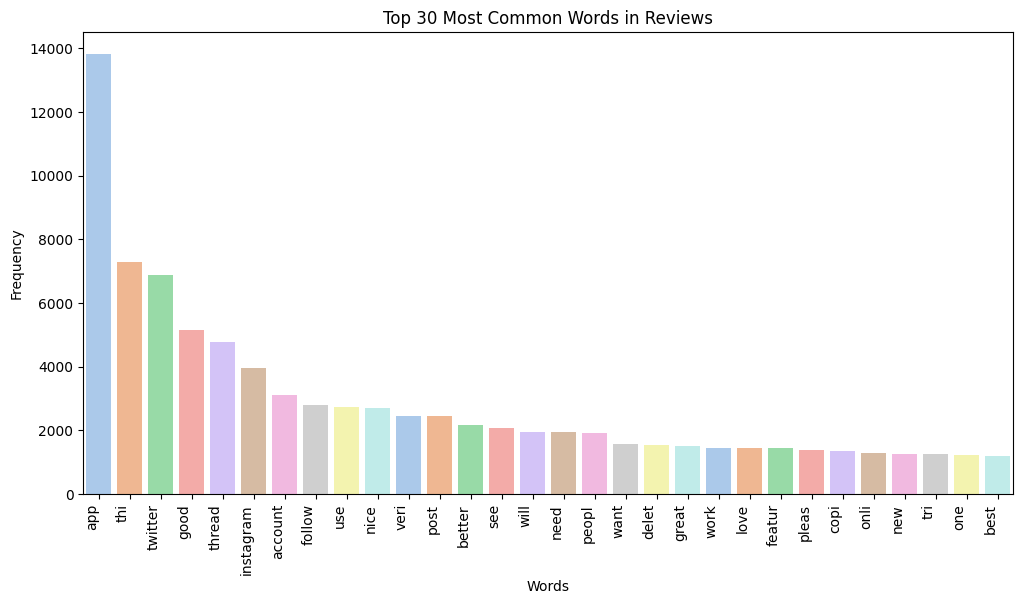

In [39]:
# from collections import Counter
# from wordcloud import STOPWORDS
# import seaborn as sns
# import matplotlib.pyplot as plt


# def process(text):
#     words = word_tokenize(text.lower())      # Lower case
#     stop_words = set(STOPWORDS)   # stopwords in text
#     words = [word for word in words if word.isalpha() and word not in stop_words]   # condition alphabet only and no stop words
#     return words

# reviews = ' '.join(df["Stemmed_Text"])    # join data combine all reviews 

# data = process(reviews)
# words = Counter(data)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=[word for word, count in words.most_common(30)], y=[count for word, count in words.most_common(30)],palette='pastel')
# plt.title('Top 30 Most Common Words in Reviews')
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90, ha='right')
# plt.show()

Aggressive text stemming involves applying stemming algorithms or techniques that aggressively reduce words, potentially leading to the loss of their intended meaning. This happens as aggressive stemming tends to remove or truncate parts of words without regard for their semantic importance or contextual relevance

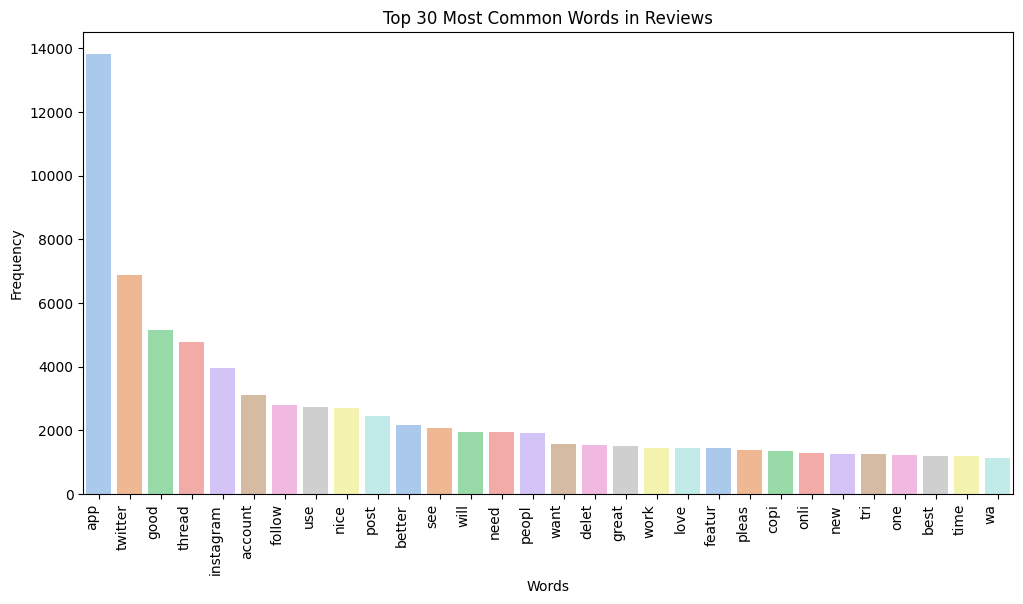

In [31]:
from collections import Counter
from wordcloud import STOPWORDS
import seaborn as sns
from nltk.tokenize import word_tokenize


def process(text):
    words = word_tokenize(text.lower())      # Lower case
    stop_words = set(STOPWORDS)   # stopwords in text
    words = [word for word in words if word.isalpha() and word not in stop_words]   # condition alphabet only and no stop words
    return words

reviews = ' '.join(df["Stemmed_Text"])    # join data combine all reviews 

data = process(reviews)
words = Counter(data)

plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, count in words.most_common(30)], y=[count for word, count in words.most_common(30)],palette='pastel')
plt.title('Top 30 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()

In [24]:
# %pip install scikit-learn

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,roc_curve,auc,precision_score

Training the Model by splitting the dataset

In [33]:
X = df["Stemmed_Text"]
y= df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

pipe1 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classification',MultinomialNB(alpha=0.005))])

pipe1.fit(X_train,y_train)
pred = pipe1.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print(classification_report(y_test,pred))

Accuracy: 0.670
              precision    recall  f1-score   support

           1       0.66      0.81      0.73      2577
           2       0.23      0.07      0.11       476
           3       0.30      0.18      0.22       634
           4       0.30      0.14      0.19       766
           5       0.76      0.84      0.80      3634

    accuracy                           0.67      8087
   macro avg       0.45      0.41      0.41      8087
weighted avg       0.62      0.67      0.63      8087



Conclusion:

Ratings with 1 and 5: The model performs relatively well for these ratings, with high precision, recall, and F1-scores. 
Ratings with 2,3,4: The model's performance is weaker for these ratings. Model struggles to correctly classify instances with these ratings.
We also know that there are some non-english which impacts the quality of the input data.
Imbalnced classes is the reason for decrease in overall performance and can be the future steps to improve the model.

## **"Understanding Data" Assignment 1 Worked Examples**

Predicting Depression and Suicide Detection from the text. This dataset is a collection from posts on Reddit platform. The goal is to preprocess the data and analyse the data about the texts of people who have chances of being in depression or have suicidal motives

In [68]:
df2 = pd.read_csv("data\\Suicide_Detection.csv")

In [69]:
df2.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


Renaming the features as it is causing trouble while applying some functions

In [75]:
df2.rename(columns={'text': 'post_text', 'class':'label'},inplace=True)

In [76]:
df2['label'].value_counts()

label
suicide        116037
non-suicide    116037
Name: count, dtype: int64

No Missing values can be found

In [77]:
df2.isnull().sum()

Unnamed: 0    0
post_text     0
label         0
dtype: int64

In [78]:
df2['label'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

the previous dataset we can observe that we need balanced data for accuracy in prediction. Here it is a balanced dataset with text data which can be classified into suicide and non-suicide

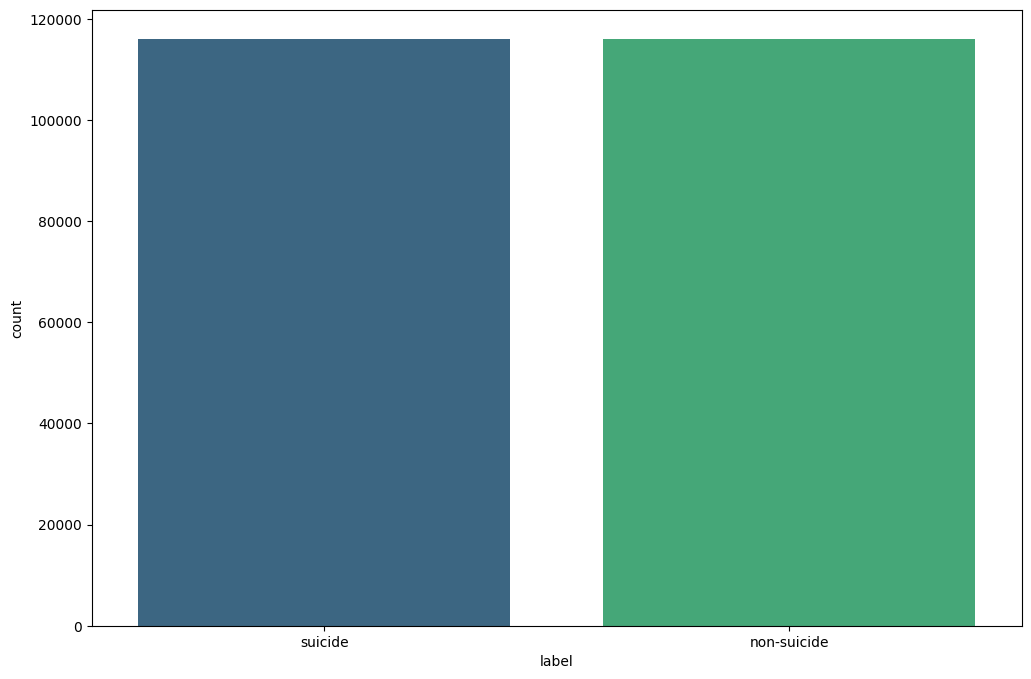

In [80]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='label', palette='viridis')
plt.show()

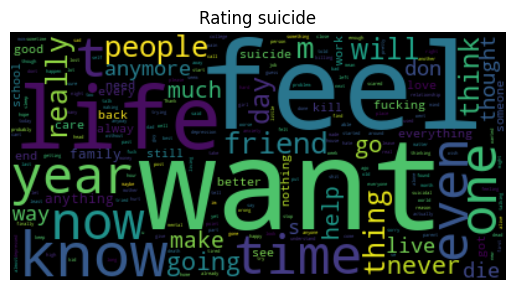

In [81]:
def create_cloud2(data):
    text = df2[df2['label']==data]
    text_cloud = ' '.join(txt for txt in text['post_text'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud2("suicide")

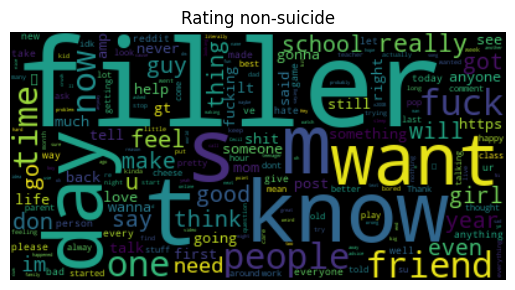

In [82]:
create_cloud2('non-suicide')

In [86]:

def cleaning_text2(text):
    text = text.lower()
    text = re.sub(r'\d+','',text)
    text = emoji.demojize(text)
    text = ''.join([i for i in text if i not in string.punctuation])
    return text
df2['new_posttext'] = df2['post_text'].apply(cleaning_text2)

In [87]:
df2['contractions'] = df2['new_posttext'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df2['no_contractions'] = [' '.join(map(str, l)) for l in df2['contractions']]
df2.drop('contractions',axis=1,inplace=True)
df2.sample(5)

,Unnamed: 0,post_text,label,new_posttext,no_contractions
167217,250875,This is where I'd put a title if I cared enoug...,suicide,this is where id put a title if i cared enough...,this is where id put a title if i cared enough...
55831,83758,Fucking multiple sclerosisProbably doesn't see...,suicide,fucking multiple sclerosisprobably doesnt seem...,fucking multiple sclerosisprobably does not se...
196663,295112,posting song lyrics out of context i love it\n...,non-suicide,posting song lyrics out of context i love it\n...,posting song lyrics out of context i love it i...
22884,34386,Coyote in a bear trapIn September I attempted ...,suicide,coyote in a bear trapin september i attempted ...,coyote in a bear trapin september i attempted ...
40897,61314,It's ok to be an incel. Change my mind. It's o...,non-suicide,its ok to be an incel change my mind its ok to...,its ok to be an incel change my mind its ok to...


In [88]:


def stem_text(text):
    words = text.split()  # Split the text into words
    stemmed_words = [ps.stem(word) for word in words]  # Apply stemming to each word
    return ' '.join(stemmed_words)

df2['Stemmed_Text'] = df2['no_contractions'].apply(stem_text)

# Display the DataFrame with the stemmed column
print(df2.head())

   Unnamed: 0                                          post_text        label  \
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide   
1           3  Am I weird I don't get affected by compliments...  non-suicide   
2           4  Finally 2020 is almost over... So I can never ...  non-suicide   
3           8          i need helpjust help me im crying so hard      suicide   
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide   

                                        new_posttext  \
0  ex wife threatening suiciderecently i left my ...   
1  am i weird i dont get affected by compliments ...   
2  finally  is almost over so i can never hear  h...   
3          i need helpjust help me im crying so hard   
4  i’m so losthello my name is adam  and i’ve bee...   

                                     no_contractions  \
0  ex wife threatening suiciderecently i left my ...   
1  am i weird i do not get affected by compliment...   
2  final

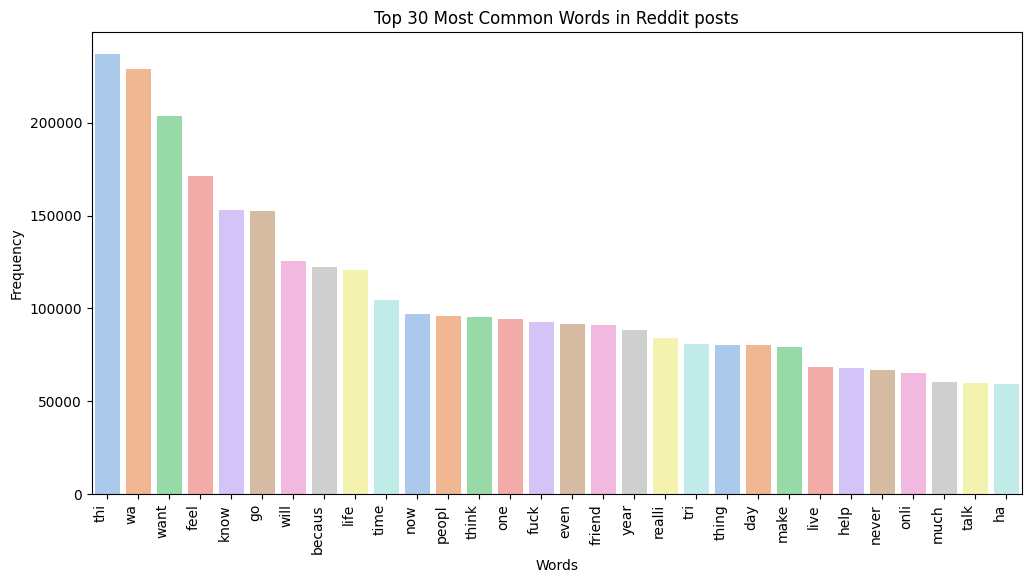

In [89]:
posttexts = ' '.join(df2["Stemmed_Text"])    # join data combine all reviews 

data = process(posttexts)
words = Counter(data)

plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, count in words.most_common(30)], y=[count for word, count in words.most_common(30)],palette='pastel')
plt.title('Top 30 Most Common Words in Reddit posts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()

In [90]:
X2 = df2["Stemmed_Text"]
y2= df2["label"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [92]:
pipe2 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classification',MultinomialNB(alpha=0.005))])

pipe2.fit(X2_train,y2_train)
pred2 = pipe2.predict(X2_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y2_test,pred2)))
print(classification_report(y2_test,pred2))

Accuracy: 0.909
              precision    recall  f1-score   support

 non-suicide       0.96      0.85      0.90     23287
     suicide       0.87      0.97      0.91     23128

    accuracy                           0.91     46415
   macro avg       0.91      0.91      0.91     46415
weighted avg       0.91      0.91      0.91     46415



We can observe that the model performance is good with an accuracy of 0.909. These results shows a balanced and reliable classification model for identifying potential suicide cases while maintaining precision in the "non-suicide" class.

## References

https://towardsdatascience.com/4-python-libraries-to-detect-english-and-non-english-language-c82ad3efd430

https://towardsdatascience.com/how-to-detect-and-translate-languages-for-nlp-project-dfd52af0c3b5

https://www.geeksforgeeks.org/introduction-to-stemming/ 
https://blogs.perficient.com/2023/03/20/the-importance-of-mobile-app-ratings-and-reviews/#:~:text=Higher%20ratings%20and%20positive%20reviews%20can%20lead%20to%20increased%20visibility,ensure%20a%20successful%20mobile%20app.

Datasets: https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch/data

https://www.kaggle.com/datasets/jayagopal20/threads-app-reviews-dataset 

## License  

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.